<a href="https://colab.research.google.com/github/piorrico/task2/blob/main/CUSTOMER_SEGMENTATION_USING_UNSUPERVISED_METHODS_AND_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) LIBRARY IMPORTATION

In [1]:
pip install weightedstats

In [2]:
pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 57.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395106 sha256=09ba8d9022d7ec5791c559dd5581fd0b3e03c004d6c9b0060e2b882a4ce8c63a
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


In [3]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=09fd18b79dc62cf9a725879159c3f75c4476515a0dd812ee258aee3a89f05bac
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [4]:
pip install scikit-learn-extra


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.7 MB/s eta 0:00:00


In [173]:

#Library Importation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
from datetime import timedelta
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.style as style
import math
from statistics import median
from scipy.stats import skew
import weightedstats as ws
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_blobs
from scipy.stats import kstest
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D








# 2)DATA IMPORTATION

In [6]:
# Datasets importation from Google Drive folder
#Customer Dataset
customers_url = 'https://drive.google.com/file/d/1trjIdykod5jlh4JCk7ZRSoKXFvovra68/view?usp=share_link'
customers_path = 'https://drive.google.com/uc?export=download&id='+customers_url.split('/')[-2]
customers_data = pd.read_csv(customers_path)
#Geolocation Dataset
geolocation_url = 'https://drive.google.com/file/d/1g635f6qGuFpqtIKe63ss2X6YgOHSLDLR/view?usp=share_link'
geolocation_path = 'https://drive.google.com/uc?export=download&id='+geolocation_url.split('/')[-2]
geolocation_data = pd.read_csv(geolocation_path)
#Items Dataset
items_url = 'https://drive.google.com/file/d/18acVf2ciN0As5Q5GbA2PnO6HyF_dOrz4/view?usp=share_link'
items_path = 'https://drive.google.com/uc?export=download&id='+items_url.split('/')[-2]
items_data = pd.read_csv(items_path)
#Payments Dataset
payments_url = 'https://drive.google.com/file/d/1CH48eJjls-_gfjMPXAAxtx1Sh0cGUq67/view?usp=share_link'
payments_path = 'https://drive.google.com/uc?export=download&id='+payments_url.split('/')[-2]
payments_data = pd.read_csv(payments_path)
#Reviews Dataset
reviews_url = 'https://drive.google.com/file/d/14EEawWIHYafD-kLbJUVeYIM9L-c1nw24/view?usp=share_link'
reviews_path = 'https://drive.google.com/uc?export=download&id='+reviews_url.split('/')[-2]
reviews_data = pd.read_csv(reviews_path)
# Orders Dataset
orders_url = 'https://drive.google.com/file/d/1QVPJERDEvBFq6tLPEvfH-OfhdHOWQV67/view?usp=share_link'
orders_path = 'https://drive.google.com/uc?export=download&id='+orders_url.split('/')[-2]
orders_data = pd.read_csv(orders_path)
# Products Dataset
products_url = 'https://drive.google.com/file/d/1HlLVfY8GrjIxRXsvqm8FaIdJS4WIIL1Q/view?usp=share_link'
products_path = 'https://drive.google.com/uc?export=download&id='+products_url.split('/')[-2]
products_data = pd.read_csv(products_path)
# Sellers Dataset
sellers_url = 'https://drive.google.com/file/d/18s2z6P6noAyaRSK2ttTsU_g3porLucOg/view?usp=share_link'
sellers_path = 'https://drive.google.com/uc?export=download&id='+sellers_url.split('/')[-2]
sellers_data= pd.read_csv(sellers_path)
# Sellers Dataset
category_name_trans_url= 'https://drive.google.com/file/d/12ApARlTizxPK3M9pAmcVbpMhQm5zPuf2/view?usp=share_link'
category_name_trans_path = 'https://drive.google.com/uc?export=download&id='+category_name_trans_url.split('/')[-2]
category_name_trans_data= pd.read_csv(category_name_trans_path)


#3)DATASETS UNDERSTANDING

In [7]:
#Analysis of datasets shape, total columns, total duplicates, total null and null columns

import pandas as pd

# Name of Datasets
datasets = [
    customers_data,
    geolocation_data,
    items_data,
    payments_data,
    reviews_data,
    orders_data,
    products_data,
    sellers_data,
    category_name_trans_data
]
titles = [
    "Customers",
    "Geolocation",
    "Items",
    "Payments",
    "Reviews",
    "Orders",
    "Products",
    "Sellers",
    "Category Translation"
]

# Datasets will be stored for analysis
data_summary = {
    'Datasets': titles,
    'Columns': [', '.join(data.columns) for data in datasets],
    'Total Rows': [data.shape[0] for data in datasets],
    'Total Columns': [data.shape[1] for data in datasets],
    'Total Duplicates': [data.duplicated().sum() for data in datasets],
    'Total Null': [data.isnull().sum().sum() for data in datasets],
    'Null Columns': [', '.join(data.columns[data.isnull().any()]) for data in datasets]
}

#  Merged dataset for analysis
data_summary_df = pd.DataFrame(data_summary)
data_summary_styled = data_summary_df.style.background_gradient(cmap='YlGnBu')

# Print the analysis
data_summary_styled

,Datasets,Columns,Total Rows,Total Columns,Total Duplicates,Total Null,Null Columns
0,Customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,
1,Geolocation,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163,5,261831,0,
2,Items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,
3,Payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0,
4,Reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",99224,7,0,145903,"review_comment_title, review_comment_message"
5,Orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441,8,0,4908,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
6,Products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951,9,0,2448,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
7,Sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,
8,Category Translation,"product_category_name, product_category_name_english",71,2,0,0,


In [8]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [9]:
# Count of missing Values
print(" \nCount of missing values : \n\n",
      orders_data.isnull().sum())

 
Count of missing values : 

 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


# 4)MERGING THE DATA

In [11]:
#Merging Datasets  with key variables
olist_dataset= pd.merge(customers_data, orders_data, on="customer_id", how='inner')
olist_dataset= olist_dataset.merge(reviews_data, on="order_id", how='inner')
olist_dataset= olist_dataset.merge(items_data, on="order_id", how='inner')
olist_dataset= olist_dataset.merge(products_data, on="product_id", how='inner')
olist_dataset= olist_dataset.merge(payments_data, on="order_id", how='inner')
olist_dataset= olist_dataset.merge(sellers_data, on='seller_id', how='inner')
olist_dataset= olist_dataset.merge(category_name_trans_data, on='product_category_name', how='inner')

olist_dataset.shape



(115609, 40)

In [13]:
#Columns of the merged dataset
olist_dataset.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name_english'],
      dtype='object')

In [15]:
#Descriptive Statistics of the merged dataset
olist_dataset.describe()

,customer_zip_code_prefix,review_score,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000,115609.000000,115609.000000,115609.000000,115609.000000
mean,35061.537597,4.034409,1.194535,120.619850,20.056880,48.766541,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167,1.093747,2.946233,172.387379,24515.713958
std,29841.671732,1.385584,0.685926,182.653476,15.836184,10.034187,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083,0.729849,2.781087,265.873969,27636.640968
min,1003.000000,1.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1001.000000
25%,11310.000000,4.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,60.870000,6429.000000
50%,24241.000000,5.000000,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2.000000,108.050000,13660.000000
75%,58745.000000,5.000000,1.000000,134.900000,21.210000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,189.480000,28605.000000
max,99980.000000,5.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,29.000000,24.000000,13664.080000,99730.000000


In [16]:
olist_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115609 non-null  object 
 1   customer_unique_id             115609 non-null  object 
 2   customer_zip_code_prefix       115609 non-null  int64  
 3   customer_city                  115609 non-null  object 
 4   customer_state                 115609 non-null  object 
 5   order_id                       115609 non-null  object 
 6   order_status                   115609 non-null  object 
 7   order_purchase_timestamp       115609 non-null  object 
 8   order_approved_at              115595 non-null  object 
 9   order_delivered_carrier_date   114414 non-null  object 
 10  order_delivered_customer_date  113209 non-null  object 
 11  order_estimated_delivery_date  115609 non-null  object 
 12  review_id                     

In [17]:
#Number of unique orders
olist_dataset['customer_unique_id'].nunique()

93396

# 5)DATA PREPROCESSING

In [18]:
#Store the Pre processed data in a new dataframe
olist_df=olist_dataset.copy()

## 5.1 INCONSISTENCIES AND MISSING VALUES TREATMENT

In [22]:
#Convert variables to date format
olist_df['order_purchase_timestamp'] = pd.to_datetime(olist_df['order_purchase_timestamp'])
olist_df['order_delivered_customer_date'] = pd.to_datetime(olist_df['order_delivered_customer_date'])
olist_df['order_estimated_delivery_date'] = pd.to_datetime(olist_df['order_estimated_delivery_date'])
olist_df['shipping_limit_date'] = pd.to_datetime(olist_df['shipping_limit_date'])
olist_df['order_delivered_carrier_date'] =pd.to_datetime(olist_df['order_delivered_carrier_date'])
olist_df['order_approved_at'] =pd.to_datetime(olist_df['order_approved_at'])

In [23]:
#Total shipping days calculation to analysesise inconsistencies
olist_df['total_shipping_days'] = olist_df['order_delivered_customer_date'] - olist_df['order_delivered_carrier_date']

In [25]:
# List of columns to modify
columns_to_modify = [ 'total_shipping_days'
                     ]

# Apply the conversion to each column
for col in columns_to_modify:
    olist_df[col] = olist_df[col].apply(lambda x: round(x.total_seconds() / 86400, 4) if isinstance(x, pd.Timedelta) else x)

In [26]:
# Percentage of missing data
missing_data = pd.concat([(olist_df.isnull().sum()), (olist_df.isnull().sum() * 100 / olist_df.isnull().count())], axis=1, keys=['Total', 'Percentage of Missing Values']).sort_values(by='Total', ascending=False)
missing_data

,Total,Percentage of Missing Values
total_shipping_days,2401,2.076828
order_delivered_customer_date,2400,2.075963
order_delivered_carrier_date,1195,1.033657
order_approved_at,14,0.012110
product_width_cm,1,0.000865
product_height_cm,1,0.000865
product_length_cm,1,0.000865
product_weight_g,1,0.000865
seller_city,0,0.000000
seller_zip_code_prefix,0,0.000000


In [32]:
#Percentages of types of order STATUS

# Filter the DataFrame by unique order_id values
filtered_df = olist_df.drop_duplicates(subset='order_id')

# Calculate the count and percentage of each order status
order_status_counts = filtered_df['order_status'].value_counts()
order_status_percentages = filtered_df['order_status'].value_counts(normalize=True) * 100

# Create a DataFrame to store the count and percentage information
order_status_summary = pd.DataFrame({
    'Order Status Count': order_status_counts,
    'Order Status Percentage': order_status_percentages.round(2)
})

# Display the order status summary
order_status_summary


,Order Status Count,Order Status Percentage
delivered,94488,97.90
shipped,1008,1.04
canceled,428,0.44
invoiced,300,0.31
processing,284,0.29
unavailable,6,0.01
approved,2,0.00


All the orders that have order_status that were not delivered will be removed. These columns do not provide any information for further analysis in customer segmentation.

In [33]:
#Only the order that are delivered will be part of the analysis
olist_df = olist_df[olist_df['order_status'] == 'delivered']

There were inconsistencies in the total_shipping_days column. It was observed that 58 orders had negative days in this column. Therefore, the selected orders were removed.

In [36]:
#Negative values of total shipping days
negative_shipping_days_rows = olist_df[olist_df['total_shipping_days'] < 0]
negative_shipping_days_rows.count()['total_shipping_days']

58

In [37]:
#Drop all the shipping days that are less than 0
olist_df = olist_df[olist_df['total_shipping_days'] >= 0]

In [38]:
# Count of missing Values
print(" \nCount of missing values : \n\n",
      olist_df.isnull().sum())

 
Count of missing values : 

 customer_id                       0
customer_unique_id                0
customer_zip_code_prefix          0
customer_city                     0
customer_state                    0
order_id                          0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      0
order_delivered_customer_date     0
order_estimated_delivery_date     0
review_score                      0
order_item_id                     0
product_id                        0
seller_id                         0
shipping_limit_date               0
price                             0
freight_value                     0
product_category_name             0
product_description_lenght        0
product_weight_g                  1
product_length_cm                 1
product_height_cm                 1
product_width_cm                  1
payment_type                      0
payment_value                    

In [39]:
olist_df.describe()

,customer_zip_code_prefix,review_score,order_item_id,price,freight_value,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_value,seller_zip_code_prefix
count,113143.000000,113143.000000,113143.000000,113143.000000,113143.000000,113143.000000,113142.000000,113142.000000,113142.000000,113142.000000,113143.000000,113143.000000
mean,35088.001343,4.083284,1.194683,119.885233,20.005302,784.798291,2106.518313,30.280532,16.596719,23.099521,171.571062,24528.672255
std,29868.208310,1.345399,0.686943,181.195606,15.712518,650.322778,3766.014437,16.147475,13.437152,11.737071,264.303458,27652.052273
min,1003.000000,1.000000,1.000000,0.850000,0.000000,4.000000,0.000000,7.000000,2.000000,6.000000,0.000000,1001.000000
25%,11310.000000,4.000000,1.000000,39.900000,13.080000,346.000000,300.000000,18.000000,8.000000,15.000000,60.850000,6429.000000
50%,24315.000000,5.000000,1.000000,74.900000,16.320000,600.000000,700.000000,25.000000,13.000000,20.000000,107.940000,13660.000000
75%,58884.000000,5.000000,1.000000,133.000000,21.190000,982.000000,1800.000000,38.000000,20.000000,30.000000,189.080000,28605.000000
max,99980.000000,5.000000,21.000000,6735.000000,409.680000,3992.000000,40425.000000,105.000000,105.000000,118.000000,13664.080000,99730.000000


There are 14 orders that have missing values in order_approved_at column but have a status of DELIVERED. Since these rows where delivered, the columns will not be removed.

In [40]:
#Missing values in order delivered carrier date
olist_df.loc[olist_df['order_approved_at'].isna(),
                   ['order_purchase_timestamp', 'order_delivered_carrier_date', 'order_delivered_customer_date','order_status']]

,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_status
4576,2017-02-18 15:52:27,2017-02-23 03:09:14,2017-03-07 13:57:47,delivered
4625,2017-01-19 22:26:59,2017-01-27 11:08:05,2017-02-06 14:22:19,delivered
4694,2017-02-19 01:28:47,2017-02-23 03:11:48,2017-03-02 03:41:58,delivered
18720,2017-01-19 12:48:08,2017-01-25 14:56:50,2017-01-30 18:16:01,delivered
22870,2017-02-18 11:04:19,2017-02-23 07:23:36,2017-03-02 16:15:23,delivered
43176,2017-02-17 15:53:27,2017-02-22 11:31:30,2017-03-03 11:47:47,delivered
51949,2017-02-17 13:05:55,2017-02-22 11:23:11,2017-03-02 11:09:19,delivered
51991,2017-02-18 17:15:03,2017-02-22 11:23:11,2017-03-03 18:43:43,delivered
52021,2017-02-18 16:48:35,2017-02-22 11:23:10,2017-03-09 07:28:47,delivered
88985,2017-02-17 17:21:55,2017-02-22 11:42:51,2017-03-03 12:16:03,delivered


In [48]:

#Fill all Nan rows from order_approved_at column with NaT format
olist_df['order_approved_at']= olist_df['order_approved_at'].fillna(pd.NaT)

There is one product of the dataset that does not contain information about its size. Therefore it will be removed.

In [49]:
#Product that has no volume
null_mask = olist_df['product_length_cm'].isnull()
null_rows = olist_df[null_mask]
null_rows

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_length_cm,product_height_cm,product_width_cm,payment_type,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,total_shipping_days
27352,1d088dea8732788ec35dd4ee6dd76112,69b2b29382af03e03e486ad307a76000,90160,porto alegre,RS,85f8ad45e067abd694b627859fa57453,delivered,2017-01-29 21:40:02,2017-01-30 22:32:20,2017-02-02 05:04:58,...,NaN,NaN,NaN,credit_card,1961.0,86020,londrina,PR,baby,5.2368


In [51]:
#Drop the product that has no information
null_mask = olist_df['product_length_cm'].isnull()
null_rows = olist_df[null_mask]
olist_df = olist_df.drop(null_rows.index).reset_index(drop=True)

In [63]:
#Store the Pre processed data in a new dataframe
olist_df_cleaned=olist_df.copy()


In [61]:
# Anlysis of order_status, customer_city and customer_state order
olist_df_cleaned[['order_status','customer_city','customer_state']].describe()

,order_status,customer_city,customer_state
count,113142,113142,113142
unique,1,4071,27
top,delivered,sao paulo,SP
freq,113142,17860,47787


In [62]:
#Last order date
olist_df_cleaned['order_purchase_timestamp'].max()

Timestamp('2018-08-29 15:00:37')

# 6)RFM ANALYSIS



*   Recency: The last order made by the customer, using order_purchase_timestamp column
*   Frequency: number of orders made by a customer, using order_id column
*   Monetary: total amount of orders made a customer, using






RECENCY CALCULATION:
- For the analysis, one day ahead of the last purchase date will be used for the analysis. The date for the analysis  is 2018-08-30  

In [64]:

# Convert 'order_purchase_timestamp' to datetime type
olist_df_cleaned['order_purchase_timestamp'] = pd.to_datetime(olist_df_cleaned['order_purchase_timestamp'])

# Set the date for analysis
current_date = olist_df_cleaned['order_purchase_timestamp'].max() + pd.DateOffset(days=1)
print(current_date)


2018-08-30 15:00:37


In [65]:
#Recency calculation df
sorted_recency_df = olist_df_cleaned.sort_values('order_purchase_timestamp', ascending=False)
recency_df = sorted_recency_df.loc[:, ['order_purchase_timestamp', 'customer_unique_id']]
recency_df = olist_df_cleaned.groupby('customer_unique_id').apply(lambda x: pd.Series({
   'order_purchase_timestamp': x['order_purchase_timestamp'].max(),
    'Recency': (current_date - x['order_purchase_timestamp'].max()).days

})).reset_index()
# Print the Recency results
recency_df


,customer_unique_id,order_purchase_timestamp,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,112
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,115
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,537
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,321
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,288
...,...,...,...
91445,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,447
91446,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,262
91447,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,568
91448,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,119


FREQUENCY CALCULATION:


In [68]:
#Frequency calculationtation using  the  number order_id per customer_id
frequency_df2 = pd.DataFrame( olist_df_cleaned.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index())
frequency_df2.rename(columns={"order_id":"Frequency"}, inplace=True)

#Sort the recency column
frequency_df2  = frequency_df2.sort_values('Frequency', ascending=False)
#Print frequency results
frequency_df2

,customer_unique_id,Frequency
50396,8d50f5eadf50201ccdcedfb9e2ac8455,14
22323,3e43e6105506432c953e165fb2acf44c,9
9865,1b6c7548a2a1f9037c1fd3ddfed95f33,7
35971,6469f99c1f9dfae7733b25662e7f1782,7
72421,ca77025e7201e3b30c44b472ff346268,7
...,...,...
30911,564c03a40766b9b404572658fb74524d,1
30910,564bc02acd888f7617b0d7c737d35aee,1
30909,564b79621999c67280ca3374ab6e5f93,1
30908,564b4b783f120f23b3a67f4004524b45,1


MONETARY CALCULATION:

In [71]:
#Monetary calculation using the total payment_value of the orders per customer_id
monetary_df=olist_df_cleaned.groupby('customer_unique_id')['payment_value'].sum().reset_index(name='Monetary')
#Sort the recency column
monetary_df  = monetary_df.sort_values('Monetary', ascending=False)
#Print the monetary resutls
monetary_df


,customer_unique_id,Monetary
3655,0a0a92112bd4c708ca5fde585afaa872,109312.64
70122,c402f431464c72e27330a67f7b94d4fb,44048.00
22936,4007669dec559734d6f53e029e360987,36489.24
85676,ef8d54b3797ea4db1d63f0ced6a906e9,30186.00
42284,763c8b1c9c68a0229c42c9fc6f662b93,29099.52
...,...,...
39865,6f5b9d1cdccc4d28f0483a612edecacf,11.63
14505,2878e5b88167faab17d4fb83a986d38b,11.63
64140,b33336f46234b24a613ad9064d13106d,10.89
67635,bd06ce0e06ad77a7f681f1a4960a3cc6,10.07


The Recency, Frequency and Monetary calculations were merged in one dataset to proceed with the segmentation process.

In [73]:
# The RFM variables are merged in RFM_df using  customer_unique_id as  key variables
RFM_df= pd.merge(recency_df, frequency_df2, on="customer_unique_id", how='inner')
RFM_df= RFM_df.merge(monetary_df, on="customer_unique_id", how='inner')
RFM_df.describe()

,Recency,Frequency,Monetary
count,91450.000000,91450.000000,91450.000000
mean,237.054073,1.032859,212.248263
std,152.541250,0.206200,631.325605
min,1.000000,1.000000,9.590000
25%,114.000000,1.000000,63.830000
50%,218.000000,1.000000,112.830000
75%,345.000000,1.000000,202.657500
max,695.000000,14.000000,109312.640000


The Recency, Frequency and Monetary column are grouped on quintiles and encoded from 1 to 5

In [75]:
# Compute quantiles for each feature
quantiles = RFM_df.quantile(q=[0.2, 0.4, 0.6, 0.8])

# Assign quartile labels for each feature
RFM_Segment = RFM_df.copy()
RFM_Segment['R_Quartile'] = RFM_Segment['Recency'].apply(lambda x: sum(x <= quantiles['Recency'].values) + 1)
RFM_Segment['F_Quartile'] = RFM_Segment['Frequency'].apply(lambda x: sum(x <= quantiles['Frequency'].values) + 1)
RFM_Segment['M_Quartile'] = RFM_Segment['Monetary'].apply(lambda x: sum(x >= quantiles['Monetary'].values) + 1)

# Concatenate the enconded RFM columns to get RFMClass
RFM_Segment['RFMClass'] = RFM_Segment['R_Quartile'].map(str) \
                            + RFM_Segment['F_Quartile'].map(str) \
                            + RFM_Segment['M_Quartile'].map(str)


<ipython-input-75-7bb67f9c8748>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quantiles = RFM_df.quantile(q=[0.2, 0.4, 0.6, 0.8])


In [76]:
#Print Quantiles of RFM variables
print(quantiles)

     Recency  Frequency  Monetary
0.2     91.0        1.0    56.010
0.4    176.0        1.0    89.660
0.6    268.0        1.0   139.930
0.8    381.0        1.0   238.182


In [78]:
#Count the RFM scores
RFM_Segment['RFMClass'].value_counts()

351    3859
252    3856
151    3790
152    3724
554    3708
353    3653
553    3642
453    3635
551    3627
454    3602
352    3566
451    3550
354    3530
255    3521
552    3520
153    3516
253    3505
452    3495
154    3471
455    3443
251    3429
555    3304
155    3301
254    3278
355    3220
515     342
315     340
415     312
215     291
115     216
314     159
514     158
414     136
214     135
114     118
513      75
213      74
413      72
313      67
113      48
412      31
112      30
212      29
512      26
312      22
111       8
411       7
311       3
211       3
511       3
Name: RFMClass, dtype: int64

In [83]:


# Convert 'customer_unique_id' column to a consistent case to prevent errors while merging
RFM_df['customer_unique_id'] = RFM_df['customer_unique_id'].str.lower()
RFM_Segment['customer_unique_id'] = RFM_Segment['customer_unique_id'].str.lower()

# Merge the RFM scores with the RFM_df
RFM_df = pd.merge(RFM_df, RFM_Segment[['customer_unique_id', 'RFMClass']],
                  on='customer_unique_id', how='left')

# Check the merged DataFrame
print("\nMerged DataFrame:")
print(RFM_df)




Merged DataFrame:
                     customer_unique_id order_purchase_timestamp  Recency  \
0      0000366f3b9a7992bf8c76cfdf3221e2      2018-05-10 10:56:27      112   
1      0000b849f77a49e4a4ce2b2a4ca5be3f      2018-05-07 11:11:27      115   
2      0000f46a3911fa3c0805444483337064      2017-03-10 21:05:03      537   
3      0000f6ccb0745a6a4b88665a16c9f078      2017-10-12 20:29:41      321   
4      0004aac84e0df4da2b147fca70cf8255      2017-11-14 19:45:42      288   
...                                 ...                      ...      ...   
91445  fffcf5a5ff07b0908bd4e2dbc735a684      2017-06-08 21:00:36      447   
91446  fffea47cd6d3cc0a88bd621562a9d061      2017-12-10 20:07:56      262   
91447  ffff371b4d645b6ecea244b27531430a      2017-02-07 15:49:16      568   
91448  ffff5962728ec6157033ef9805bacc48      2018-05-02 15:17:41      119   
91449  ffffd2657e2aad2907e67c3e9daecbeb      2017-05-02 20:18:45      484   

       Frequency  Monetary RFMClass_x RFMClass_y RFMClas

Descriptive statistics for Recency:
count    91450.000000
mean       237.054073
std        152.541250
min          1.000000
25%        114.000000
50%        218.000000
75%        345.000000
max        695.000000
Name: Recency, dtype: float64

Skewness value for Recency:
0.45

Descriptive statistics for Frequency:
count    91450.000000
mean         1.032859
std          0.206200
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         14.000000
Name: Frequency, dtype: float64

Skewness value for Frequency:
10.66

Descriptive statistics for Monetary:
count     91450.000000
mean        212.248263
std         631.325605
min           9.590000
25%          63.830000
50%         112.830000
75%         202.657500
max      109312.640000
Name: Monetary, dtype: float64

Skewness value for Monetary:
71.65



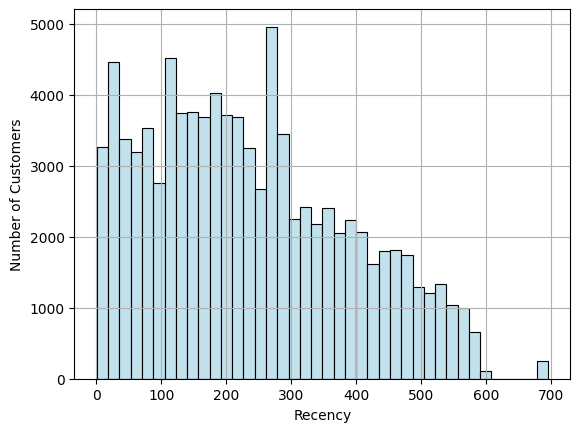

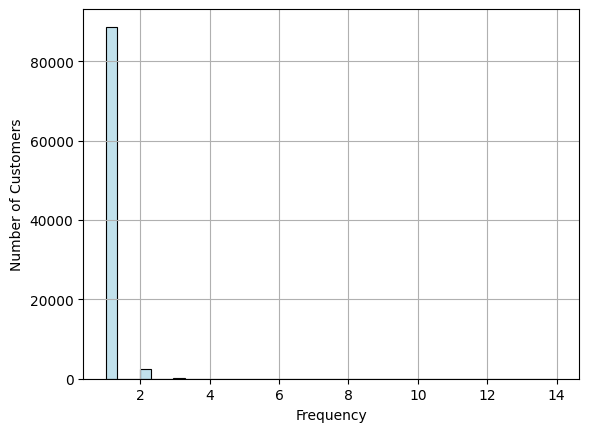

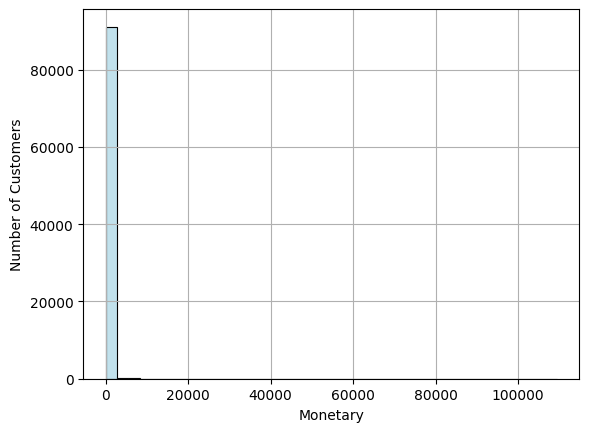

In [85]:
#Descriptive statistics and frequency distributions of RFM variables


rfm_data = RFM_df

# Perform univariate analysis for each RFM metric
for metric in ['Recency', 'Frequency', 'Monetary']:
    # Calculate descriptive statistics
    statistics = rfm_data[metric].describe()
    print(f"Descriptive statistics for {metric}:\n{statistics}\n")

    # Create a histogram with distribution line
    plt.figure()
    sns.histplot(data=rfm_data, x=metric, bins=40, color='lightblue', edgecolor='black')
    plt.xlabel(metric)
    plt.ylabel('Number of Customers')
    plt.grid(True)  # Add grid

    # Calculate skewness
    skewness = np.round(rfm_data[metric].skew(), 2)
    print(f"Skewness value for {metric}:\n{skewness}\n")


The correlation analysis was performed on RFM variables to analyze if there are relationships between variables. However, no strong correlations were observed.

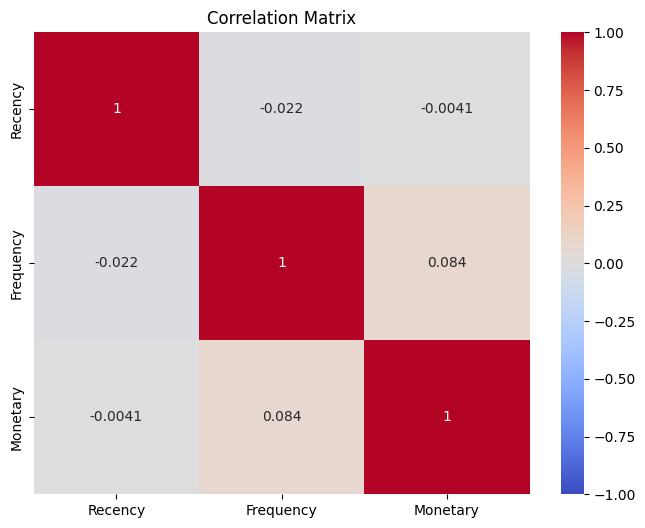

In [88]:
correlation_matrix = RFM_df[['Recency', 'Frequency', 'Monetary']].corr()


# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

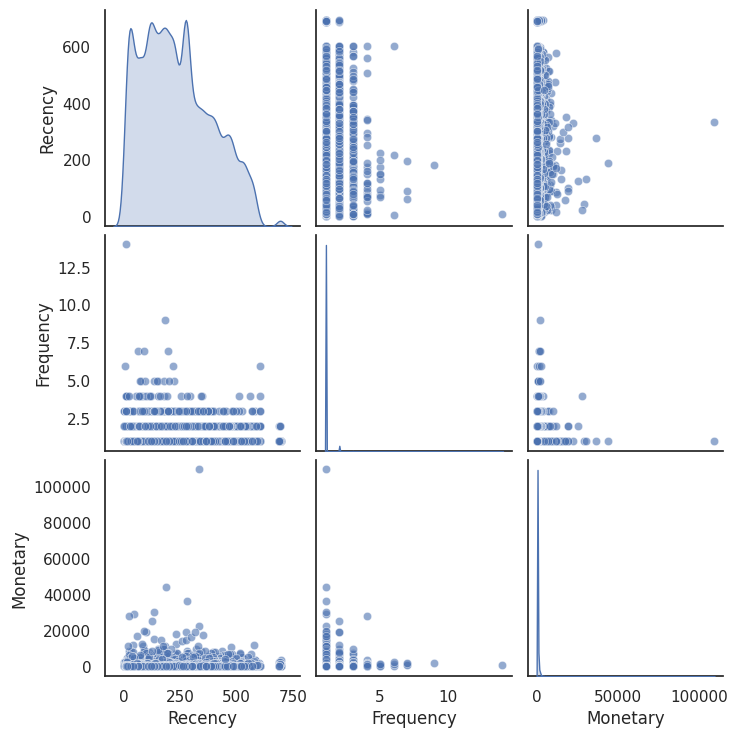

In [89]:

# Calculate the correlation matrix
correlation_matrix = RFM_df[['Recency', 'Frequency', 'Monetary']].corr()

# Plot the correlogram
sns.set(style='white')
sns.pairplot(RFM_df[['Recency', 'Frequency', 'Monetary']], diag_kind='kde', plot_kws={'alpha': 0.6})

plt.show()


 Kolmogorov-Smirnov and Shapiro Wilk Normality tests were performed to verify if the RFM variables follow a normal distribution

In [96]:

# Columns to analyze
column_name = 'Recency'
data = RFM_df['Recency']

# Kolmogorov-Smirnov test
statistic, p_value = kstest(data, 'norm')

# Significance level
alpha = 0.05

# Check distribution
if p_value > alpha:
    print(f"The  column '{column_name}' follows a normal distribution.")
else:
    print(f"The column '{column_name}' does not follow a normal distribution.")




The column 'Recency' does not follow a normal distribution.


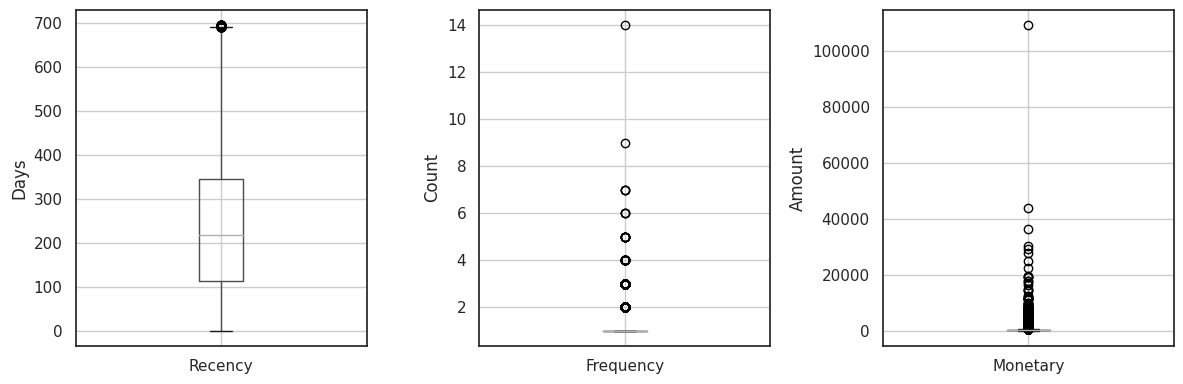

In [101]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot box plots RFM variables
RFM_df.boxplot(column='Recency', ax=axes[0])
#axes[0].set_title('Recency')
axes[0].set_ylabel('Days')
rfm_data.boxplot(column='Frequency', ax=axes[1])
#axes[1].set_title('Frequency')
axes[1].set_ylabel('Count')
rfm_data.boxplot(column='Monetary', ax=axes[2])
#axes[2].set_title('Monetary')
axes[2].set_ylabel('Amount')
# Adjust the layout
plt.tight_layout()
# Display the plot
plt.show()


The visualizations of RFM variables over time are displayed as follows/ It is observed that  from 2016-10 to 2017-01 there were no others placed in the platform

      order_purchase_timestamp  Recency  Frequency  Monetary
0          2016-10-03 16:56:50    694.0        1.0     39.09
1          2016-10-03 21:13:36    694.0        1.0     53.73
2          2016-10-03 22:06:03    694.0        1.0    133.46
3          2016-10-03 22:31:31    694.0        1.0     40.95
4          2016-10-03 22:44:10    694.0        1.0    154.57
...                        ...      ...        ...       ...
91213      2018-08-29 12:25:59      0.0        1.0     73.10
91214      2018-08-29 14:18:23      0.0        1.0   1021.92
91215      2018-08-29 14:18:28      0.0        1.0     61.29
91216      2018-08-29 14:52:00      0.0        1.0     33.23
91217      2018-08-29 15:00:37      0.0        1.0     93.75

[91218 rows x 4 columns]


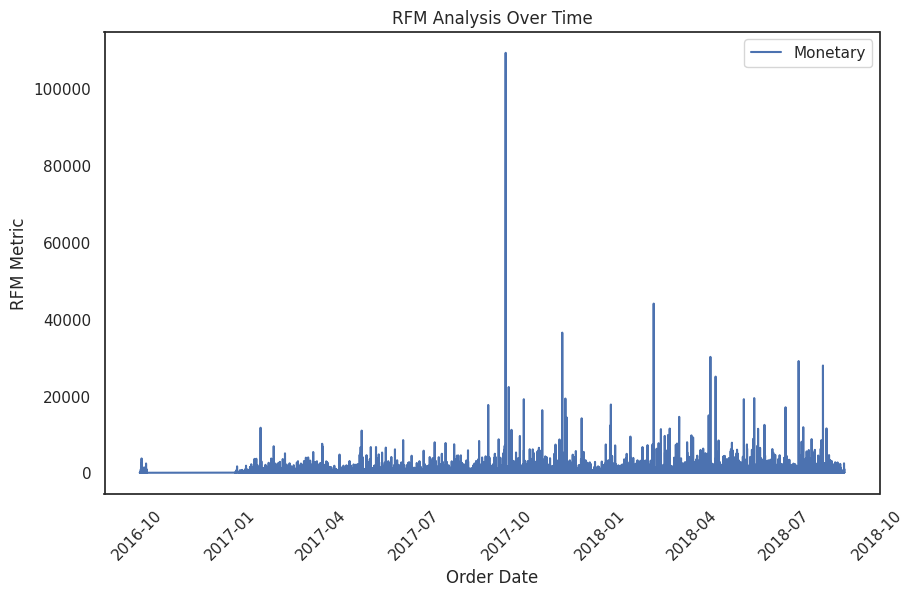

In [114]:
#RFM_analysis over time and visualizations over time
rfm_df = RFM_df

# Convert 'order_date' column to datetime type
rfm_df['order_purchase_timestamp'] = pd.to_datetime(rfm_df['order_purchase_timestamp'])

# Set date for analysis
reference_date = rfm_df['order_purchase_timestamp'].max()

# Calculate RFM variables for visualizations
rfm_df['Recency'] = (reference_date - rfm_df['order_purchase_timestamp']).dt.days
rfm_df['Frequency'] = rfm_df['Frequency']
rfm_df['Monetary'] = rfm_df['Monetary']

# Perform RFM analysis over time
rfm_over_time = rfm_df.groupby('order_purchase_timestamp').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

print(rfm_over_time)
# Convert 'order_date' column to datetime type
rfm_over_time['order_purchase_timestamp'] = pd.to_datetime(rfm_over_time['order_purchase_timestamp'])

# Monetary Plot
plt.figure(figsize=(10, 6))
plt.plot(rfm_over_time['order_purchase_timestamp'], rfm_over_time['Monetary'], label='Monetary')
plt.xlabel('Order Date')
plt.ylabel('RFM Metric')
plt.title('RFM Analysis Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

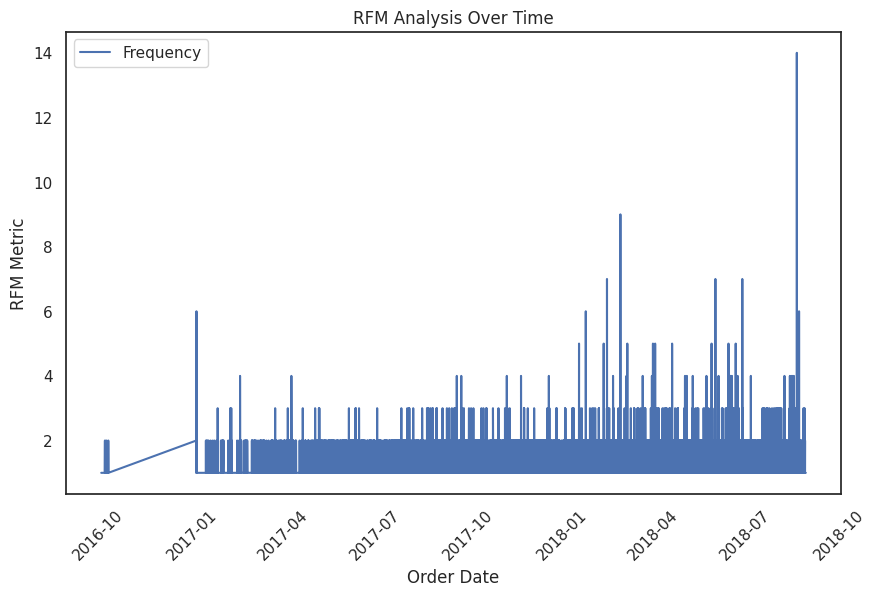

In [109]:
# Frequency Plot
plt.figure(figsize=(10, 6))
plt.plot(rfm_over_time['order_purchase_timestamp'], rfm_over_time['Frequency'], label='Frequency')
plt.xlabel('Order Date')
plt.ylabel('RFM Metric')
plt.title('RFM Analysis Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Selection of RFM variables for clustering process

In [123]:
# Select specific columns and store them in another DataFrame
selected_columns_rfm = RFM_df[['customer_unique_id','Recency','Frequency','Monetary']]
selected_columns_rfm.describe()

,Recency,Frequency,Monetary
count,91450.000000,91450.000000,91450.000000
mean,236.054073,1.032859,212.248263
std,152.541250,0.206200,631.325605
min,0.000000,1.000000,9.590000
25%,113.000000,1.000000,63.830000
50%,217.000000,1.000000,112.830000
75%,344.000000,1.000000,202.657500
max,694.000000,14.000000,109312.640000


Since the Monetary column is highly right skewed, it is necessary to apply a log transformation to the variale before the clustering process.

# 7) TRANSFORMATION

In [124]:

#Log transformation of Monetary column
selected_columns_rfm['Monetary']= np.log(selected_columns_rfm['Monetary'])


<ipython-input-124-8d7adfc5627d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_rfm['Monetary']= np.log(selected_columns_rfm['Monetary'])


<ipython-input-127-80e791d41d37>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(selected_columns_rfm['Recency'])
<ipython-input-127-80e791d41d37>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(selected_columns_rfm['Frequency'])
<ipython-input-127-8

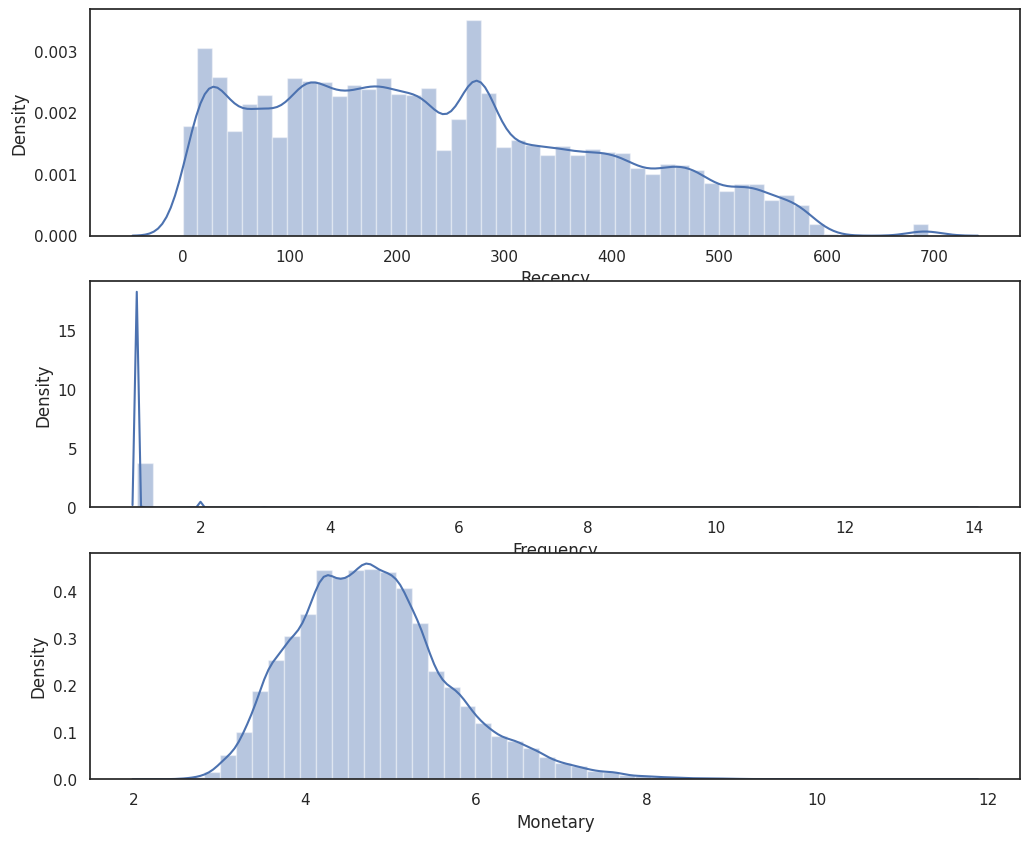

In [127]:
# Frequency distribution of RFM variables after transformation process
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1); sns.distplot(selected_columns_rfm['Recency'])
plt.subplot(3, 1, 2); sns.distplot(selected_columns_rfm['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(selected_columns_rfm['Monetary'])
plt.show()

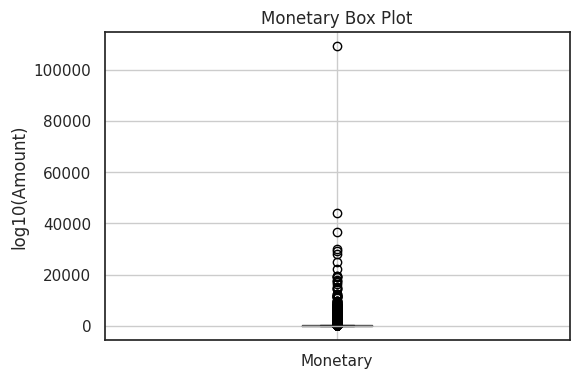

In [132]:
#Box plot of Monetary variable after applying log transformation
# Create a figure and axes
fig, ax = plt.subplots(figsize=(6, 4))

rfm_df.boxplot(column='Monetary', ax=ax)

ax.set_ylabel('log10(Amount)')
ax.set_title('Monetary Box Plot')
plt.show()


In [158]:
#The transformed variables will be stored in another df
RFM_log_trans=selected_columns_rfm.copy()

# 8) OUTLIER TREATMENT

In [159]:
#FUNCTIONS FOR OUTLIER DETECTION
#Using IQR method
def num_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outliers_df= df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
    return print("Number of outliers in {} column: ".format(col_name), len(outliers_df)), print("Indexes: ", outliers_df.index)

def erase_outliers_monetary(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1  # Interquartile range
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr

    outliers_df = df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)].copy()
    outliers_df['Cluster'] =4

    df_out = df_in.drop(outliers_df.index)

    print("Number of outliers in {} column: {}".format(col_name, len(outliers_df)))
    print("Indexes:", outliers_df.index)

    return df_out, outliers_df

def erase_outliers_recency(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1  # Interquartile range
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr

    outliers_df = df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)].copy()
    outliers_df['Cluster'] =3

    df_out = df_in.drop(outliers_df.index)

    print("Number of outliers in {} column: {}".format(col_name, len(outliers_df)))
    print("Indexes:", outliers_df.index)

    return df_out, outliers_df

Outlier detection from original RFM data

*   Outliers count in  Recency, Frequency and  Monetary( column without transformation)




In [160]:
for i in ['Recency','Frequency',"Monetary"]:
    num_outlier(RFM_df, i)
    print("*"*40)

Number of outliers in Recency column:  149
Indexes:  Int64Index([   72,  2408,  2962,  3330,  3942,  4816,  5067,  6105,  6248,
             6369,
            ...
            85370, 85532, 86327, 86464, 88550, 89045, 89209, 89574, 89796,
            91243],
           dtype='int64', length=149)
****************************************
Number of outliers in Frequency column:  2705
Indexes:  Int64Index([  103,   241,   302,   399,   414,   423,   433,   462,   464,
              495,
            ...
            90855, 90869, 90925, 91025, 91029, 91096, 91187, 91288, 91304,
            91407],
           dtype='int64', length=2705)
****************************************
Number of outliers in Monetary column:  8940
Indexes:  Int64Index([    7,    18,    22,    25,    52,    56,    58,    70,    74,
               77,
            ...
            91332, 91359, 91361, 91405, 91416, 91418, 91424, 91439, 91441,
            91445],
           dtype='int64', length=8940)
***********************

Outlier detection from log transformed data


*   Outliers count in  Transformed Monetary column:




In [161]:
for i in ['Recency','Frequency',"Monetary"]:
    num_outlier(RFM_log_trans, i)
    print("*"*40)

Number of outliers in Recency column:  149
Indexes:  Int64Index([   72,  2408,  2962,  3330,  3942,  4816,  5067,  6105,  6248,
             6369,
            ...
            85370, 85532, 86327, 86464, 88550, 89045, 89209, 89574, 89796,
            91243],
           dtype='int64', length=149)
****************************************
Number of outliers in Frequency column:  2705
Indexes:  Int64Index([  103,   241,   302,   399,   414,   423,   433,   462,   464,
              495,
            ...
            90855, 90869, 90925, 91025, 91029, 91096, 91187, 91288, 91304,
            91407],
           dtype='int64', length=2705)
****************************************
Number of outliers in Monetary column:  1806
Indexes:  Int64Index([   22,   128,   197,   220,   225,   254,   255,   286,   411,
              432,
            ...
            91111, 91135, 91183, 91227, 91248, 91278, 91298, 91359, 91439,
            91445],
           dtype='int64', length=1806)
***********************

The outliers from Recency and Monetary columns were stored in separates dataframes as separate clusters

In [162]:

#Outliers from Monetary column

RFM_log_trans_wo, outliers = erase_outliers_monetary(RFM_log_trans, 'Monetary')



Number of outliers in Monetary column: 1806
Indexes: Int64Index([   22,   128,   197,   220,   225,   254,   255,   286,   411,
              432,
            ...
            91111, 91135, 91183, 91227, 91248, 91278, 91298, 91359, 91439,
            91445],
           dtype='int64', length=1806)


In [163]:
#Outliers from Recency column
RFM_log_trans_wo, outliers2 = erase_outliers_recency(RFM_log_trans_wo, 'Recency')

outliers2.describe()

Number of outliers in Recency column: 146
Indexes: Int64Index([   72,  2408,  2962,  3330,  3942,  4816,  5067,  6105,  6248,
             6369,
            ...
            85370, 85532, 86327, 86464, 88550, 89045, 89209, 89574, 89796,
            91243],
           dtype='int64', length=146)


,Recency,Frequency,Monetary,Cluster
count,146.000000,146.000000,146.000000,146.0
mean,692.404110,1.006849,4.890681,3.0
std,1.054244,0.082761,0.900384,0.0
min,691.000000,1.000000,2.924236,3.0
25%,691.000000,1.000000,4.268461,3.0
50%,693.000000,1.000000,4.784235,3.0
75%,693.000000,1.000000,5.533139,3.0
max,694.000000,2.000000,6.994089,3.0


<ipython-input-164-46dee064d35f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(outliers2['Recency'])
<ipython-input-164-46dee064d35f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(outliers2['Frequency'])
<ipython-input-164-46dee064d35f>:6: UserWa

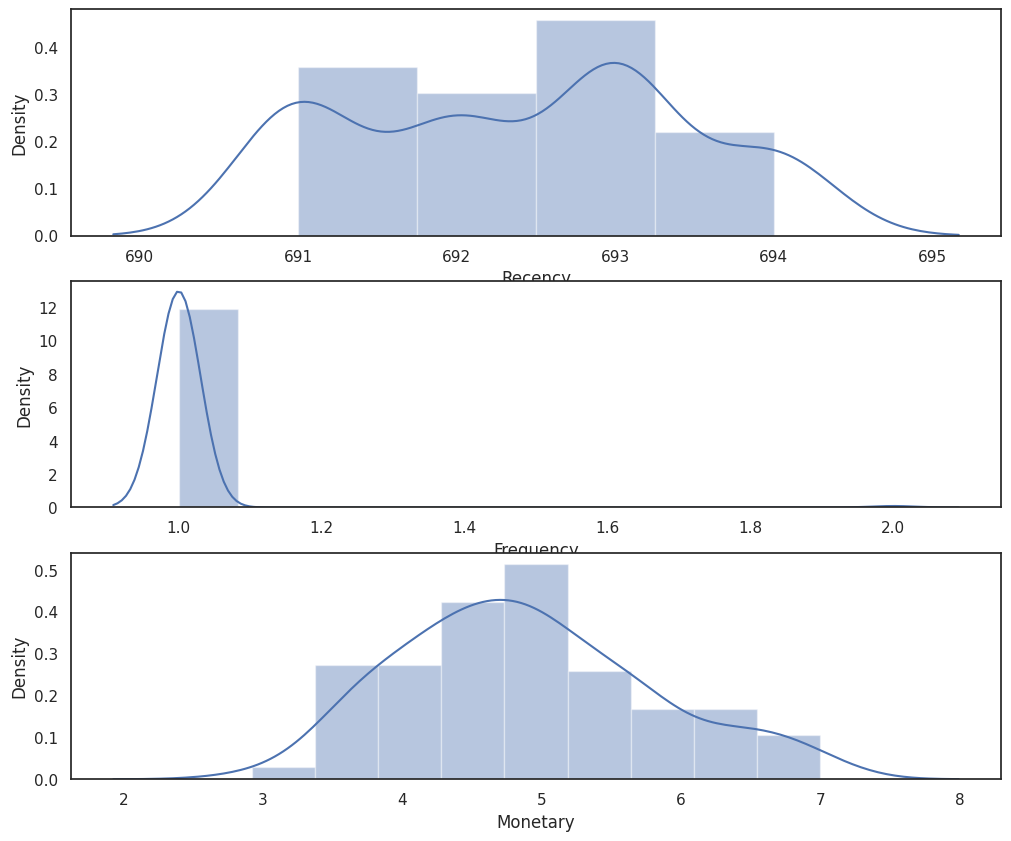

In [164]:
#Frequency distribution of Recency Outliers

plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1); sns.distplot(outliers2['Recency'])
plt.subplot(3, 1, 2); sns.distplot(outliers2['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(outliers2['Monetary'])
plt.show()

<ipython-input-165-1251e77abc2c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(outliers['Recency'])
<ipython-input-165-1251e77abc2c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(outliers['Frequency'])
<ipython-input-165-1251e77abc2c>:6: UserWarn

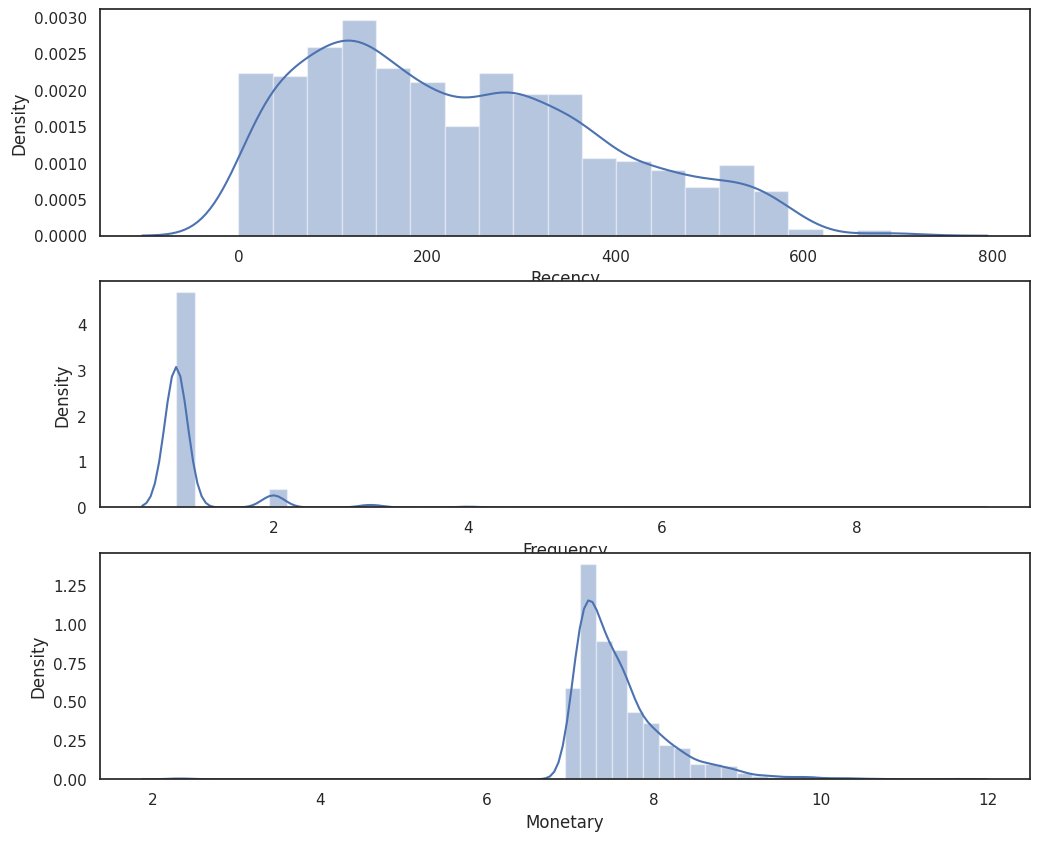

In [165]:
#Frequency distribution of Monetary Outliers

plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1); sns.distplot(outliers['Recency'])
plt.subplot(3, 1, 2); sns.distplot(outliers['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(outliers['Monetary'])
plt.show()

#9) SCALING

After the transformation and Outlier analysis, the scaling procedure was performed. The MinMax scaling was implemented on RFM variables.

In [168]:

# Select the columns to be scaled
columns_to_scale = ['Recency', 'Frequency', 'Monetary']

# Create a new DataFrame with the selected columns
RFM_log_trans_wo_scaled = RFM_log_trans_wo[['customer_unique_id'] + columns_to_scale].copy()

# MIN-MAX scaling
scaler = MinMaxScaler()
RFM_log_trans_wo_scaled[columns_to_scale] = scaler.fit_transform(RFM_log_trans_wo_scaled[columns_to_scale])

# Print the scaled RFM DataFrame
print(RFM_log_trans_wo_scaled)



                     customer_unique_id   Recency  Frequency  Monetary
0      0000366f3b9a7992bf8c76cfdf3221e2  0.160870        0.0  0.544907
1      0000b849f77a49e4a4ce2b2a4ca5be3f  0.165217        0.0  0.184994
2      0000f46a3911fa3c0805444483337064  0.776812        0.0  0.436380
3      0000f6ccb0745a6a4b88665a16c9f078  0.463768        0.0  0.287954
4      0004aac84e0df4da2b147fca70cf8255  0.415942        0.0  0.616250
...                                 ...       ...        ...       ...
91444  fffb09418989a0dbff854a28163e47c6  0.368116        0.0  0.400601
91446  fffea47cd6d3cc0a88bd621562a9d061  0.378261        0.0  0.432196
91447  ffff371b4d645b6ecea244b27531430a  0.821739        0.0  0.494256
91448  ffff5962728ec6157033ef9805bacc48  0.171014        0.0  0.531924
91449  ffffd2657e2aad2907e67c3e9daecbeb  0.700000        0.0  0.395784

[89498 rows x 4 columns]


#10) VALIDATION FUNCTIONS


The validation functions for K-means and K-means++ clustering are defined in the following cell. The Elbow method and Silhouette analysis were used to dinf the optimal number of clusters.

In [170]:
#******ELBOW ANALYSIS FUNCTION******
#KMEANS

def elbow_method_kmeans(X, k_values):
    distortions = []

    for k in k_values:
        kmeans = KMeans(n_clusters=k, init='random')
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    # Plot the elbow curve
    plt.plot(k_values, distortions, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    plt.title('Elbow Method')
    plt.xticks(k_values)  # Set x-axis ticks to match k_values
    plt.show()

#KMEANS++
def elbow_method_kmeans_plusplus(X, k_values):
    distortions = []

    for k in k_values:
        kmeans = KMeans(n_clusters=k, init='k-means++')
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    # Plot the elbow curve
    plt.plot(k_values, distortions, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    plt.title('Elbow Method')
    plt.show()




#******SILHOUTTE ANALYSIS FUNCTION******
#Compute the Silhouette score for k number of clusters (2 to 10)
#K MEANS
def perform_rfm_analysis(X):
    range_n_clusters = [2, 3, 4, 5, 6]
    silhouette_avg_n_clusters = []

    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

        silhouette_avg_n_clusters.append(silhouette_avg)
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])
        ax1.set_xticks([-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        centers = clusterer.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

    style.use("fivethirtyeight")
    plt.plot(range_n_clusters, silhouette_avg_n_clusters)
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.show()
#KMEANS++
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib import cm

def perform_rfm_analysis_updated(X):
    range_n_clusters = list(range(2, 10))  # Update the range from 2 to 10

    silhouette_scores = []
    num_clusters = []

    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, random_state=42, init='k-means++')
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters, "The average silhouette_score is:", silhouette_avg)

        silhouette_scores.append(silhouette_avg)
        num_clusters.append(n_clusters)

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])
        ax1.set_xticks([-0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        centers = clusterer.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.figure()
    plt.plot(num_clusters, silhouette_scores, 'bo-')
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette score")
    plt.title("Silhouette score vs. Number of clusters")
    plt.show()










# 11) CLUSTER ANALYSIS

## 11.1 K-MEANS

In [ ]:
#Elbow Analysis
k_values = [2, 3, 4, 5, 6, 8, 9, 10]
elbow_method_kmeans(selected_columns_kmeans, k_values)

In [ ]:
## WITH STANDARD SCALING
perform_rfm_analysis(selected_columns_kmeans)

NameError: ignored

## 11.2 K-MEANS++

ELBOW METHOD:
The plot shows a decreasing trend of the Sum of squared errors (SSE)as the number of cluster increases. K=2 and K=3 present a dramatically increase of SSE. However, the graph does not provide a clear elbow point.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

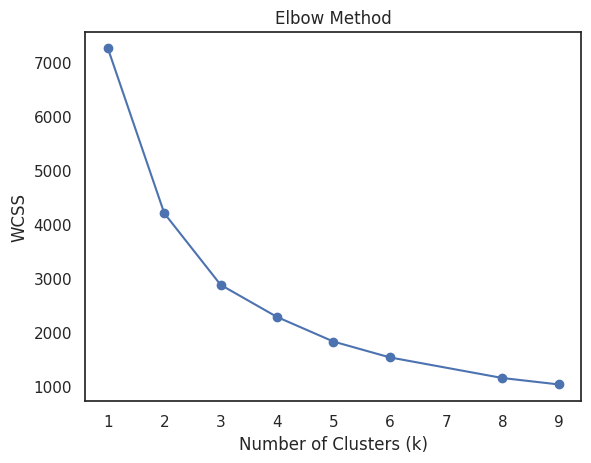

In [171]:

#Elbow Analysis
k_values = [1, 2, 3, 4, 5, 6, 8, 9]
elbow_method_kmeans_plusplus(RFM_log_trans_wo_scaled[['Recency','Frequency','Monetary']], k_values)


SILHOUETTE SCORE:
- After analyzingylzing the silhouette scores of k clusters (k[2, 9]), It was found that at  K=2 the silhouette score was the highest. Therefore, k=2 were the optimal number of clusters for the Kmeans++ algorithm



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: ignored

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


For n_clusters = 2 The average silhouette_score is: 0.3809064444844309


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is: 0.36040439174287037


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: ignored

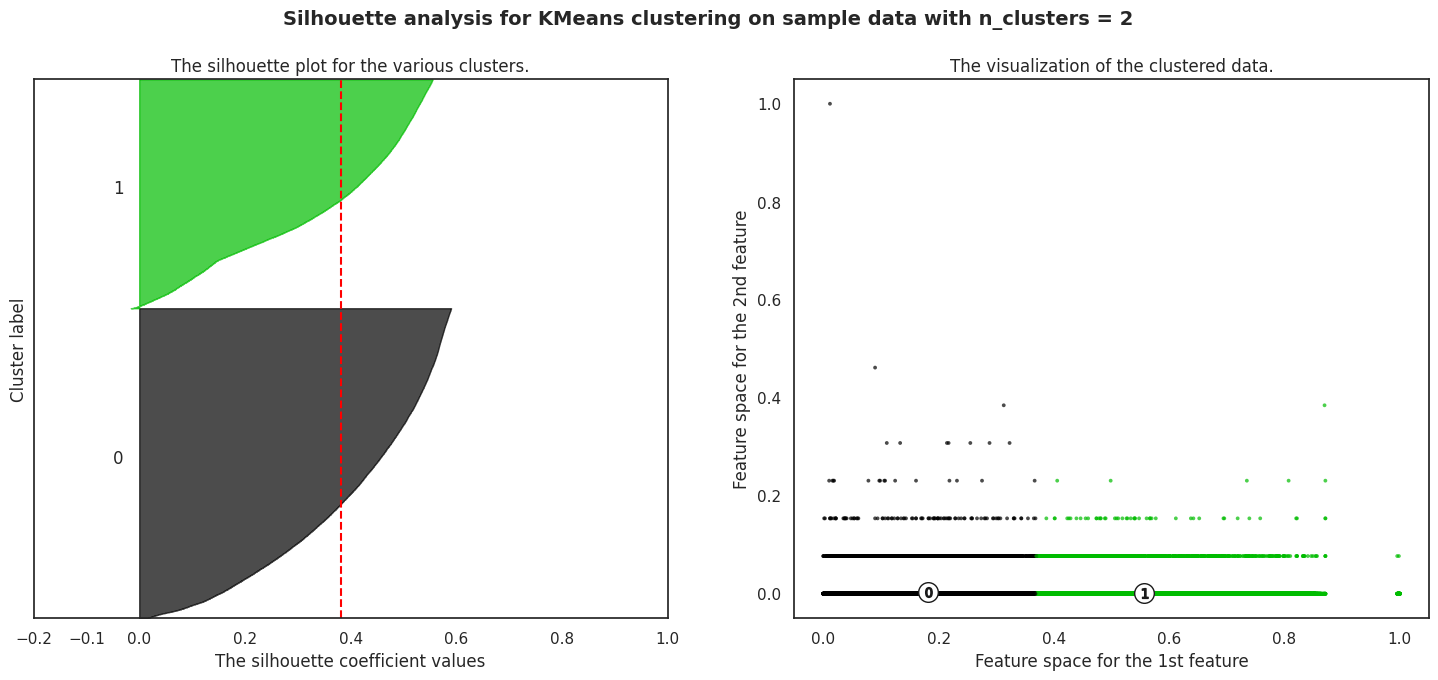

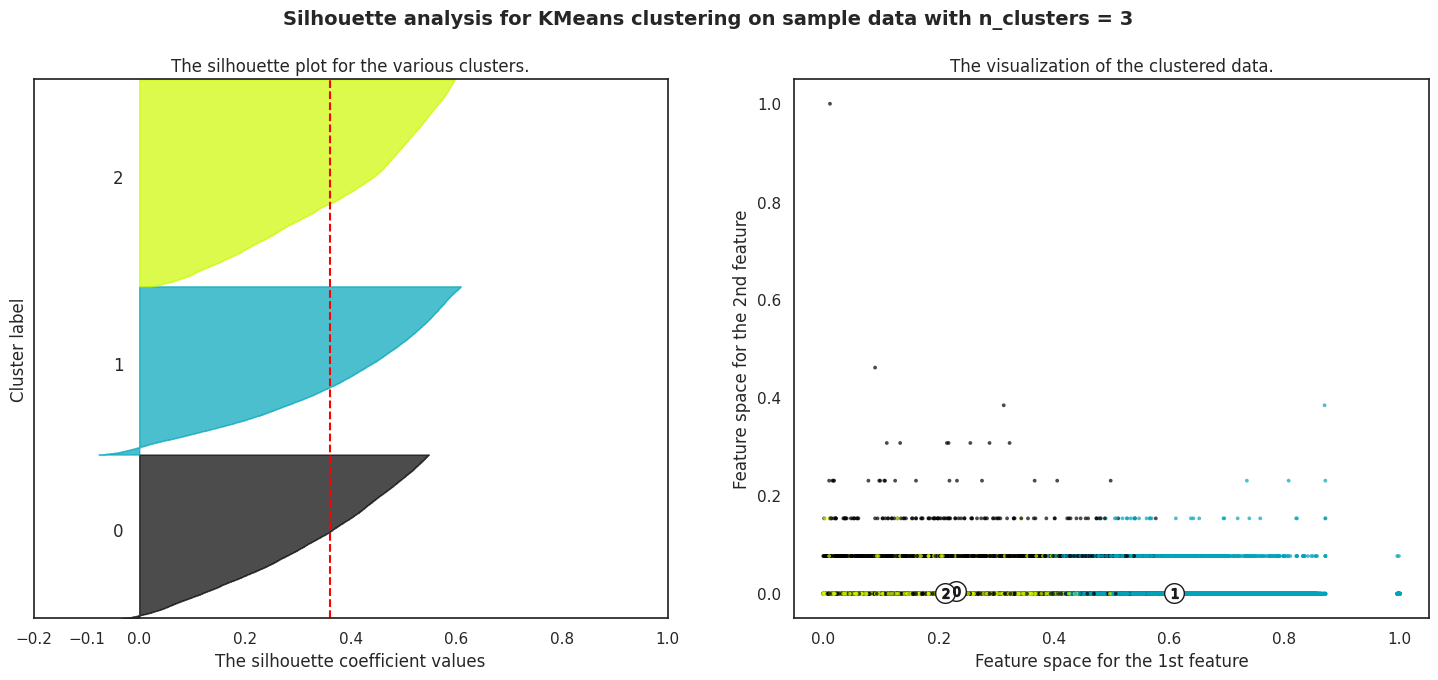

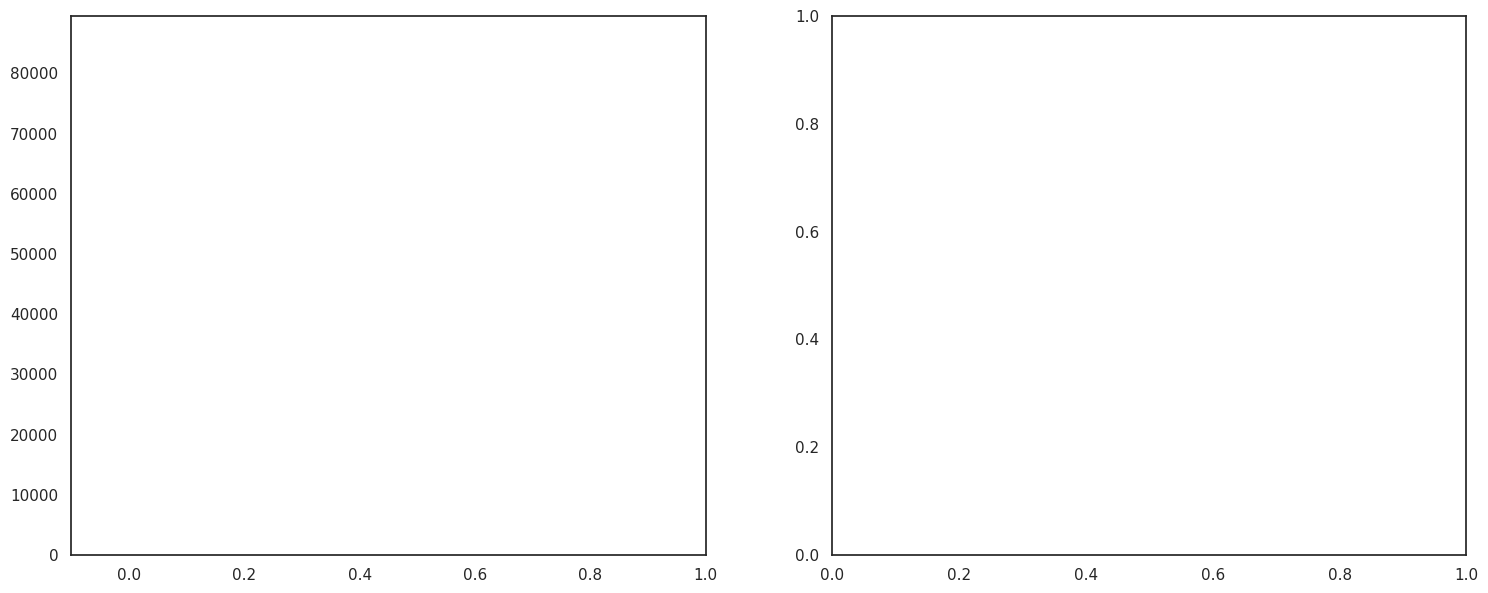

In [175]:
#Silhouette Score for KMEANS++
perform_rfm_analysis_updated(RFM_log_trans_wo_scaled[['Recency','Frequency','Monetary']])

 The K-means++ clustering process was performed with k=2. Each customer_id was labelled with the cluster number for the segmentation analysis. The cluster label is stored in the Cluster column.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


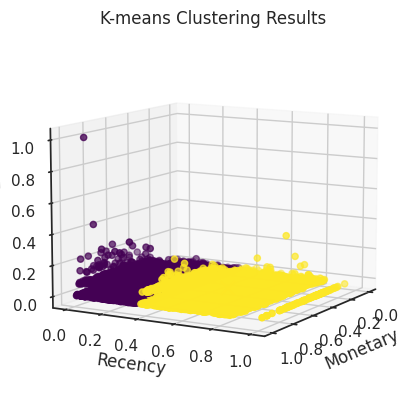

                     customer_unique_id   Recency  Frequency  Monetary  \
0      0000366f3b9a7992bf8c76cfdf3221e2  0.160870        0.0  0.544907   
1      0000b849f77a49e4a4ce2b2a4ca5be3f  0.165217        0.0  0.184994   
2      0000f46a3911fa3c0805444483337064  0.776812        0.0  0.436380   
3      0000f6ccb0745a6a4b88665a16c9f078  0.463768        0.0  0.287954   
4      0004aac84e0df4da2b147fca70cf8255  0.415942        0.0  0.616250   
...                                 ...       ...        ...       ...   
91444  fffb09418989a0dbff854a28163e47c6  0.368116        0.0  0.400601   
91446  fffea47cd6d3cc0a88bd621562a9d061  0.378261        0.0  0.432196   
91447  ffff371b4d645b6ecea244b27531430a  0.821739        0.0  0.494256   
91448  ffff5962728ec6157033ef9805bacc48  0.171014        0.0  0.531924   
91449  ffffd2657e2aad2907e67c3e9daecbeb  0.700000        0.0  0.395784   

       Cluster  
0            0  
1            0  
2            1  
3            1  
4            1  
...      

In [176]:

# Perform  K-means++ clustering with k=2
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(RFM_log_trans_wo_scaled[['Recency','Frequency','Monetary']])

# Get the cluster labels and cluster centers
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the data points with color-coded clusters
scatter = ax.scatter(RFM_log_trans_wo_scaled['Monetary'], RFM_log_trans_wo_scaled['Recency'], RFM_log_trans_wo_scaled['Frequency'], c=cluster_labels, cmap='viridis')

# Scatter plot the cluster centers
ax.scatter(cluster_centers[:, 2], cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100)

# Set labels and title
ax.set_xlabel('Monetary')
ax.set_ylabel('Recency')
ax.set_zlabel('Frequency')
ax.set_title('K-means Clustering Results')

# View Angle of the plot. Adjust the angle  and elevation of the graph
ax.view_init(azim=30, elev=10)

# Print the plot
plt.show()

# Add the cluster_labels as a new column in the RFM dataframe
RFM_log_trans_wo_scaled['Cluster'] = cluster_labels

# Print the clusterred customer
print(RFM_log_trans_wo_scaled)


  The RFM_log_trans_wo_scaled Dataframe has the RFM variables scaled from 0 to 1. To proceed with the segmentation analysis, it is necessary to use the real units of each variable. Thus, the RFM values were changed to the original scale.

In [177]:
#Replacing the values of RFM to obtain the real scale of the variables
RFM_log_trans_wo_scaled = RFM_log_trans_wo_scaled.merge(RFM_df[['customer_unique_id', 'Recency', 'Frequency', 'Monetary','RFMClass']], on='customer_unique_id', how='left')
RFM_log_trans_wo_scaled[['Recency', 'Frequency', 'Monetary']] = RFM_log_trans_wo_scaled[['Recency_y', 'Frequency_y', 'Monetary_y']]
RFM_log_trans_wo_scaled.drop(['Recency_x', 'Frequency_x', 'Monetary_x', 'Recency_y', 'Frequency_y', 'Monetary_y'], axis=1, inplace=True)
RFM_log_trans_wo_scaled

,customer_unique_id,Cluster,RFMClass,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,0,454,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0,451,114,1,27.19
2,0000f46a3911fa3c0805444483337064,1,152,536,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,1,251,320,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,1,254,287,1,196.89
...,...,...,...,...,...,...
89493,fffb09418989a0dbff854a28163e47c6,0,352,254,1,73.16
89494,fffea47cd6d3cc0a88bd621562a9d061,1,352,261,1,84.58
89495,ffff371b4d645b6ecea244b27531430a,1,153,567,1,112.46
89496,ffff5962728ec6157033ef9805bacc48,0,453,118,1,133.69


In [178]:
#Transform the outliers to original scale
outliers = outliers.merge(RFM_df[['customer_unique_id', 'Recency', 'Frequency', 'Monetary','RFMClass']], on='customer_unique_id', how='left')
outliers[['Recency', 'Frequency', 'Monetary']] = outliers[['Recency_y', 'Frequency_y', 'Monetary_y']]
outliers.drop(['Recency_x', 'Frequency_x', 'Monetary_x', 'Recency_y', 'Frequency_y', 'Monetary_y'], axis=1, inplace=True)
outliers.describe()

,Cluster,Recency,Frequency,Monetary
count,1806.0,1806.000000,1806.000000,1806.000000
mean,4.0,232.385382,1.142857,2495.197863
std,0.0,152.708325,0.522694,3662.882670
min,4.0,0.000000,1.000000,9.590000
25%,4.0,108.000000,1.000000,1348.135000
50%,4.0,209.000000,1.000000,1692.320000
75%,4.0,340.000000,1.000000,2429.650000
max,4.0,693.000000,9.000000,109312.640000


In [179]:
#Merge the clustered dataset with the clusters made in the outlier treatment process
concatenated_df = pd.concat([RFM_log_trans_wo_scaled, outliers], axis=0)
concatenated_df.describe()


,Cluster,Recency,Frequency,Monetary
count,91304.000000,91304.000000,91304.000000,91304.000000
mean,0.495444,235.324345,1.032901,212.259664
std,0.698101,151.566791,0.206336,631.766194
min,0.000000,0.000000,1.000000,9.590000
25%,0.000000,113.000000,1.000000,63.820000
50%,0.000000,217.000000,1.000000,112.810000
75%,1.000000,344.000000,1.000000,202.620000
max,4.000000,693.000000,14.000000,109312.640000


In [ ]:

# Group by 'Cluster' and calculate the averages
cluster_averages = concatenated_df.groupby('Cluster')['Recency', 'Frequency', 'Monetary'].mean()

# Calculate the overall averages
overall_averages = concatenated_df[['Recency', 'Frequency', 'Monetary']].mean()

# Get the size of each cluster
cluster_sizes = concatenated_df['Cluster'].value_counts().rename('Cluster Size')

# Create a new DataFrame to display the results
result_df = pd.concat([cluster_averages, cluster_sizes], axis=1)
result_df.loc['Overall'] = pd.Series({**overall_averages.to_dict(), 'Cluster Size': len(concatenated_df)})

# Display the result table
print(result_df)


            Recency  Frequency     Monetary  Cluster Size
0        236.516490   1.033647   214.342802       52503.0
1        235.984119   1.031943   208.916365       38798.0
4        233.385382   1.142857  2495.197863        1806.0
Overall  236.233880   1.035059   256.394970       93107.0


<ipython-input-311-9d97bb070db6>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_averages = concatenated_df.groupby('Cluster')['Recency', 'Frequency', 'Monetary'].mean()


<ipython-input-278-884f2cb601ac>:45: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  counts = counts[rfm_classes != 'Other'].append(pd.Series(other_count, index=['Other']))
<ipython-input-278-884f2cb601ac>:48: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rfm_classes = rfm_classes[rfm_classes != 'Other'].append(pd.Series('Other'))
<ipython-input-278-884f2cb601ac>:45: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  counts = counts[rfm_classes != 'Other'].append(pd.Series(other_count, index=['Other']))
<ipython-input-278-884f2cb601ac>:48: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rfm_classes = rfm_classes[rfm_classes != 'Other'].appen

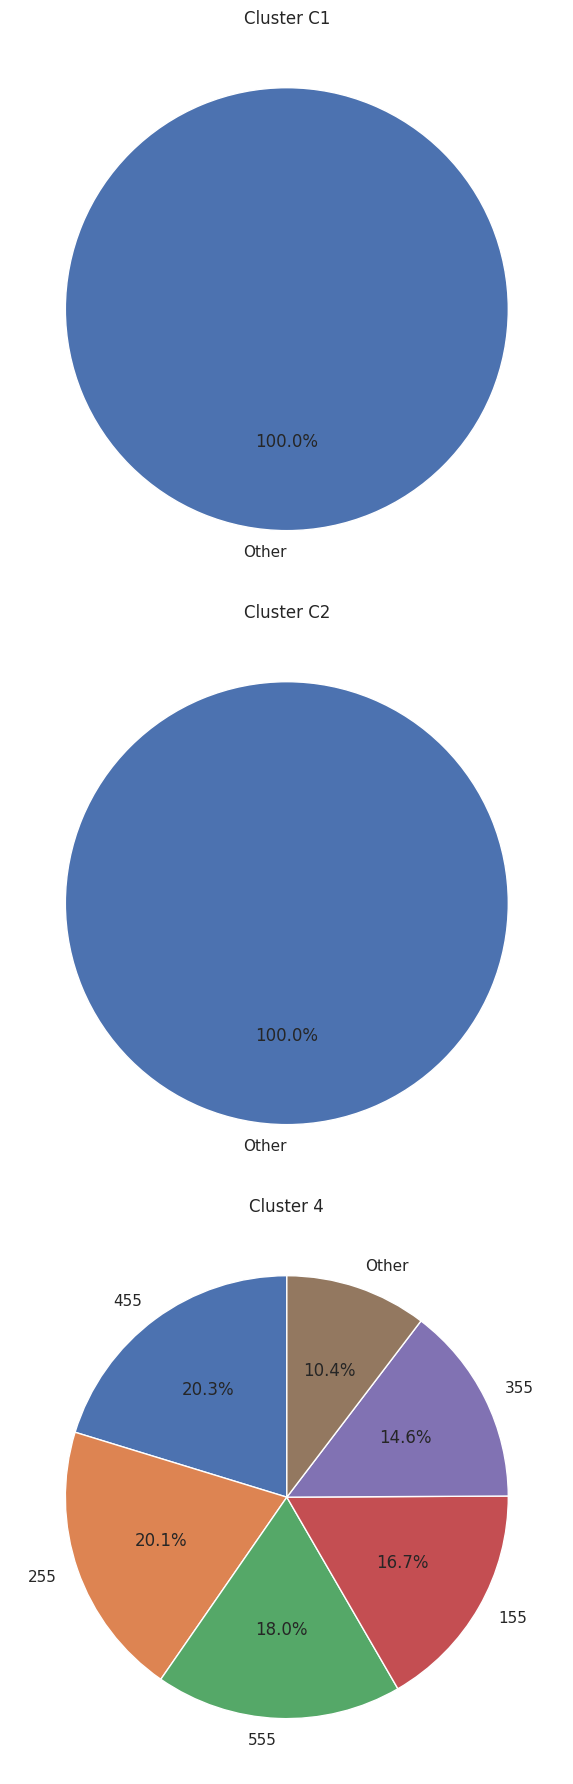

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'Cluster' column to integer
concatenated_df['Cluster'] = concatenated_df['Cluster'].astype(int)

# Dictionary mapping cluster IDs to names
cluster_names = {
    0: 'Cluster C1',
    1: 'Cluster C2',
    2: 'Cluster C3',
    3: 'Cluster C4',
    5: 'Cluster C5',
}

# Group the DataFrame by Cluster and RFMClass and calculate the count
grouped = concatenated_df.groupby(['Cluster', 'RFMClass']).size().reset_index(name='Count')

# Calculate the total count for each cluster
cluster_totals = grouped.groupby('Cluster')['Count'].sum().reset_index(name='Total')

# Filter out RFMClass categories with less than 2% count within each cluster
filtered_grouped = grouped.merge(cluster_totals, on='Cluster')
filtered_grouped['Percentage'] = filtered_grouped['Count'] / filtered_grouped['Total']
filtered_grouped.loc[filtered_grouped['Percentage'] < 0.052, 'RFMClass'] = 'Other'

# Get unique clusters
clusters = filtered_grouped['Cluster'].unique()

# Create subplots for each cluster with larger size
num_clusters = len(clusters)
fig, axs = plt.subplots(num_clusters, 1, figsize=(8, 6*num_clusters))

# Iterate over clusters and create a pie chart for each
for i, cluster in enumerate(clusters):
    # Filter the grouped data for the current cluster
    cluster_data = filtered_grouped[filtered_grouped['Cluster'] == cluster]
    rfm_classes = cluster_data['RFMClass']
    counts = cluster_data['Count']

    # Calculate the count for the "Other" category within the current cluster
    other_count = counts[rfm_classes == 'Other'].sum()

    # Append the "Other" count to the counts array
    counts = counts[rfm_classes != 'Other'].append(pd.Series(other_count, index=['Other']))

    # Append the "Other" label to the rfm_classes array
    rfm_classes = rfm_classes[rfm_classes != 'Other'].append(pd.Series('Other'))

    # Sort the counts and rfm_classes arrays in descending order
    counts, rfm_classes = zip(*sorted(zip(counts, rfm_classes), reverse=True))

    # Create the pie chart with larger size
    axs[i].pie(counts, labels=rfm_classes, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(cluster_names.get(cluster, f'Cluster {cluster}'))

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()





In [ ]:
RFM_log_trans_wo_scaled.describe()

,Cluster,Recency,Frequency,Monetary
count,89498.000000,89498.000000,89498.000000,89498.000000
mean,0.424736,236.383651,1.030682,166.191748
std,0.494306,151.543940,0.194099,171.164216
min,0.000000,1.000000,1.000000,11.630000
25%,0.000000,114.000000,1.000000,63.100000
50%,0.000000,218.000000,1.000000,110.040000
75%,1.000000,345.000000,1.000000,194.300000
max,1.000000,691.000000,14.000000,1146.360000


<ipython-input-426-e6c8d8d5ece6>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(cluster_data['Frequency'], cluster_data['Recency'], cluster_data['Monetary'], c=color, label=f'Cluster {cluster}', s=1)  # Adjust the value of s to make the dots smaller


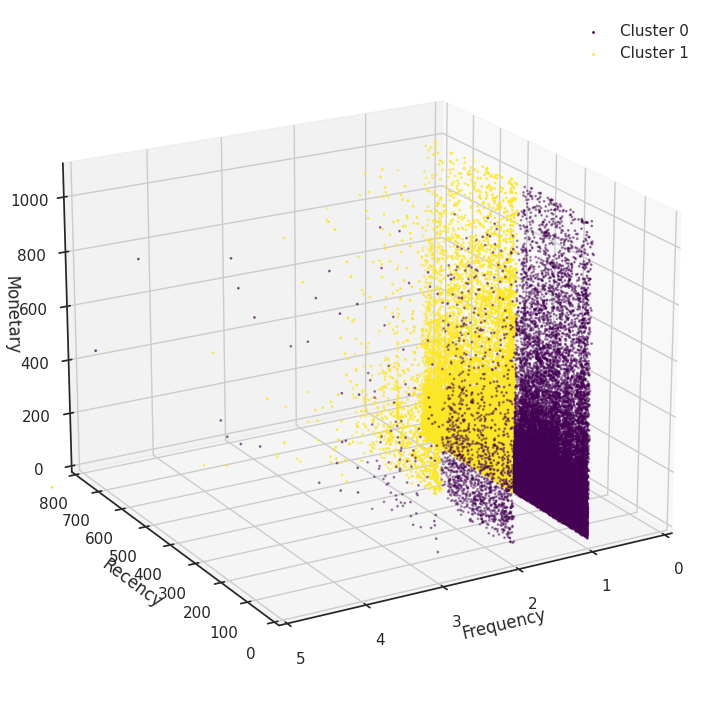

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming concatenated_df is the DataFrame with "Recency", "Frequency", "Monetary", and "Cluster" columns

# Create a larger figure
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Get unique cluster labels
clusters = RFM_log_trans_wo_scaled['Cluster'].unique()

# Assign a different color to each cluster
colors = plt.cm.viridis(clusters / max(clusters))

# Scatter plot the data points with color-coded clusters
for cluster, color in zip(clusters, colors):
    cluster_data = RFM_log_trans_wo_scaled[RFM_log_trans_wo_scaled['Cluster'] == cluster]
    ax.scatter(cluster_data['Frequency'], cluster_data['Recency'], cluster_data['Monetary'], c=color, label=f'Cluster {cluster}', s=1)  # Adjust the value of s to make the dots smaller

# Set labels and title
ax.set_xlabel('Frequency ')
ax.set_ylabel('Recency ')
ax.set_zlabel('Monetary')
#ax.set_title('3D Plot of RFM Variables Grouped by Clusters')
ax.legend()

# Set the range of each axis
ax.set_xlim3d(0, 5)  # Modify the range of the x-axis
ax.set_ylim3d(800, 0)  # Modify the range of the y-axis
ax.set_zlim3d(0, 1100)  # Modify the range of the z-axis

# Set the viewing angl
ax.view_init(azim=60, elev=20)

# Show the plot
plt.show()


<ipython-input-428-4030a400f3db>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(cluster_data['Frequency'], cluster_data['Recency'], cluster_data['Monetary'], c=color, label=f'Cluster {cluster}', s=1)  # Adjust the value of s to make the dots smaller


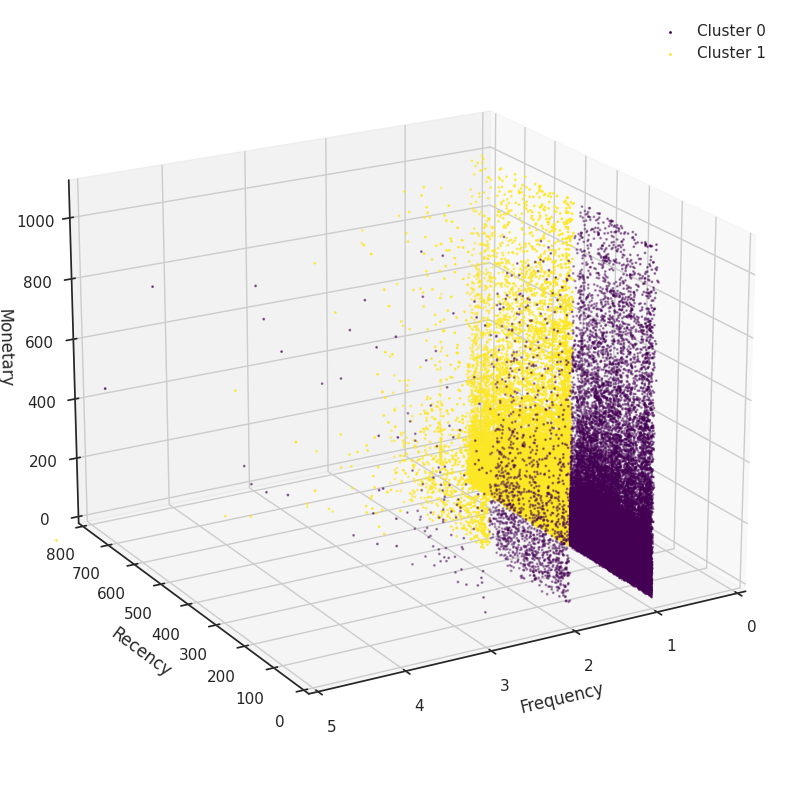

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming RFM_log_trans_wo_scaled is the DataFrame with "Recency", "Frequency", "Monetary", and "Cluster" columns

# Create a larger figure
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111, projection='3d')

# Get unique cluster labels
clusters = RFM_log_trans_wo_scaled['Cluster'].unique()

# Assign a different color to each cluster
colors = plt.cm.viridis(clusters / max(clusters))

# Scatter plot the data points with color-coded clusters
for cluster, color in zip(clusters, colors):
    cluster_data = RFM_log_trans_wo_scaled[RFM_log_trans_wo_scaled['Cluster'] == cluster]
    ax.scatter(cluster_data['Frequency'], cluster_data['Recency'], cluster_data['Monetary'], c=color, label=f'Cluster {cluster}', s=1)  # Adjust the value of s to make the dots smaller

# Set labels and title
ax.set_xlabel('Frequency', labelpad=10)
ax.set_ylabel('Recency', labelpad=10)
ax.set_zlabel('Monetary', labelpad=10)
#ax.set_title('3D Plot of RFM Variables Grouped by Clusters')
ax.legend()

# Set the range of each axis
ax.set_xlim3d(0, 5)  # Modify the range of the x-axis
ax.set_ylim3d(800, 0)  # Modify the range of the y-axis
ax.set_zlim3d(0, 1100)  # Modify the range of the z-axis

# Set the viewing angle
ax.view_init(azim=60, elev=20)

# Show the plot
plt.show()


<ipython-input-417-606052561207>:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(cluster_data['Frequency'], cluster_data['Recency'], cluster_data['Monetary'], c=color, label=f'Cluster {cluster}', s=1)  # Adjust the value of s to make the dots smaller


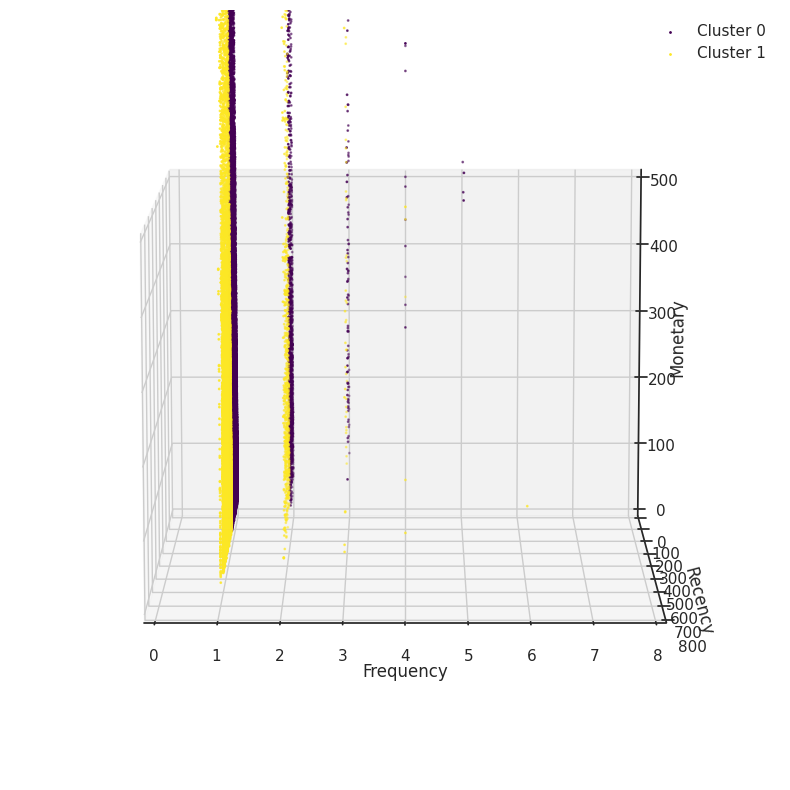

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming concatenated_df is the DataFrame with "Recency", "Frequency", "Monetary", and "Cluster" columns

# Create a larger figure
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Get unique cluster labels
clusters = RFM_log_trans_wo_scaled['Cluster'].unique()

# Assign a different color to each cluster
colors = plt.cm.viridis(clusters / max(clusters))

# Scatter plot the data points with color-coded clusters
for cluster, color in zip(clusters, colors):
    cluster_data = RFM_log_trans_wo_scaled[RFM_log_trans_wo_scaled['Cluster'] == cluster]
    ax.scatter(cluster_data['Frequency'], cluster_data['Recency'], cluster_data['Monetary'], c=color, label=f'Cluster {cluster}', s=1)  # Adjust the value of s to make the dots smaller

# Set labels and title
ax.set_xlabel('Frequency', labelpad=7)  # Add space between the x-axis label and the axis
ax.set_ylabel('Recency', labelpad=7)  # Add space between the y-axis label and the axis
ax.set_zlabel('Monetary', labelpad=4)  # Add space between the z-axis label and the axis
#ax.set_title('3D Plot of RFM Variables Grouped by Clusters')
ax.legend()

# Set the range of each axis
ax.set_xlim3d(8, 0)  # Modify the range of the x-axis
ax.set_ylim3d(0, 800)  # Modify the range of the y-axis
ax.set_zlim3d(0, 500)  # Modify the range of the z-axis

# Set the viewing angle
ax.view_init(azim=90, elev=10)

# Show the plot
plt.show()



<ipython-input-261-a150cfe224be>:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(cluster_data['Frequency'], cluster_data['Recency'], c=color, label=f'Cluster {cluster}', s=10)  # Adjust the value of s to change the dot size


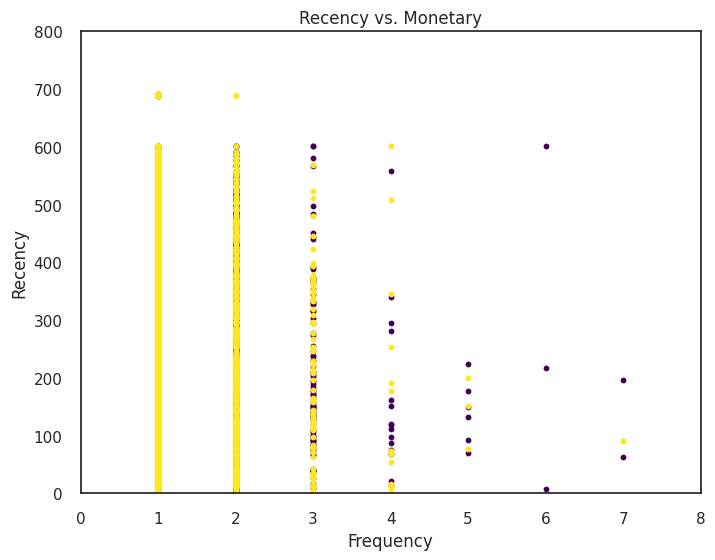

In [ ]:
import matplotlib.pyplot as plt

# Assuming concatenated_df is the DataFrame with "Recency", "Frequency", "Monetary", and "Cluster" columns

# Create a figure
fig, ax = plt.subplots(figsize=(8, 6))

# Get unique cluster labels
clusters = RFM_log_trans_wo_scaled['Cluster'].unique()

# Assign a different color to each cluster
colors = plt.cm.viridis(clusters / max(clusters))

# Scatter plot the data points with color-coded clusters
for cluster, color in zip(clusters, colors):
    cluster_data = RFM_log_trans_wo_scaled[RFM_log_trans_wo_scaled['Cluster'] == cluster]
    ax.scatter(cluster_data['Frequency'], cluster_data['Recency'], c=color, label=f'Cluster {cluster}', s=10)  # Adjust the value of s to change the dot size

# Set labels and title
ax.set_xlabel('Frequency')
ax.set_ylabel('Recency')
ax.set_title('Recency vs. Monetary')

# Set the range of each axis
ax.set_xlim(0, 8)  # Modify the range of the x-axis
ax.set_ylim(0, 800)  # Modify the range of the y-axis

# Show the legend
#ax.legend()

# Show the plot
plt.show()


In [ ]:
44

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn_extra.cluster import KMedoids




# Define a range of k values
k_values = range(2, 10)

# Initialize an empty list to store the sum of squared distances
ssd = []

# Calculate the sum of squared distances for each value of k
for k in k_values:
    kmedoids = KMedoids(n_clusters=k, random_state=0).fit(RFM_log_trans_wo_scaled[['Recency','Frequency','Monetary']])
    ssd.append(kmedoids.inertia_)

# Plot the elbow curve
plt.plot(k_values, ssd, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Curve for K-Medoids Clustering')
plt.show()
